# ANALYSE DES DONNEES RECUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importation des fichiers

In [3]:
file_dir_send = '../Collecte/2/Send/dataset_send.csv'
file_dir_p2_sf7 = '../Collecte/2/Send/dataset_send868000000_p2_sf7.csv'
file_dir_p2_sf12 = '../Collecte/2/Send/dataset_send868000000_p2_sf12.csv'
file_dir_p14_sf7 = '../Collecte/2/Send/dataset_send868000000_p14_sf7.csv'
file_dir_p14_sf12 = '../Collecte/2/Send/dataset_send868000000_p14_sf12.csv'

send_col_names = ['id', 'ambit_humidity', 'temperature', 'soil_moisture', 'transmited_power', 'sf', 'rx_timestamp', 'rssi', 'snr', 'sfrx', 'sftx', 'tx_trials', 'tx_power', 'tx_time_on_air', 'tx_counter', 'tx_frequency']

df_send = pd.read_csv(file_dir_send, sep=';', header=None, usecols=range(len(send_col_names)), names=send_col_names)
df_send_p2_sf7 = pd.read_csv(file_dir_p2_sf7, sep=';', header=None, usecols=range(len(send_col_names)), names=send_col_names)
df_send_p2_sf12 = pd.read_csv(file_dir_p2_sf12, sep=';', header=None, usecols=range(len(send_col_names)), names=send_col_names)
df_send_p14_sf7 = pd.read_csv(file_dir_p14_sf7, sep=';', header=None, usecols=range(len(send_col_names)), names=send_col_names)
df_send_p14_sf12 = pd.read_csv(file_dir_p14_sf12, sep=';', header=None, usecols=range(len(send_col_names)), names=send_col_names)

In [4]:
file_dir_recv = '../Collecte/2/Recv/dataset_recv.csv'
file_dir_p2_sf7 = '../Collecte/2/Recv/dataset_recv868000000_p2_sf7.csv'
file_dir_p2_sf12 = '../Collecte/2/Recv/dataset_recv868000000_p2_sf12.csv'
file_dir_p14_sf7 = '../Collecte/2/Recv/dataset_recv868000000_p14_sf7.csv'
file_dir_p14_sf12 = '../Collecte/2/Recv/dataset_recv868000000_p14_sf12.csv'

recv_col_names = ['date', 'id', 'ambit_humidity', 'temperature', 'soil_moisture', 'transmited_power', 'sf', 'lost_time', 'rx_timestamp', 'rssi', 'snr', 'sfrx', 'sftx', 'tx_trials', 'tx_power', 'tx_time_on_air', 'tx_counter', 'tx_frequency']

df_recv = pd.read_csv(file_dir_recv, sep=';', header=None, usecols=range(len(recv_col_names)), names=recv_col_names)
df_recv_p2_sf7 = pd.read_csv(file_dir_p2_sf7, sep=';', header=None, usecols=range(len(recv_col_names)), names=recv_col_names)
df_recv_p2_sf12 = pd.read_csv(file_dir_p2_sf12, sep=';', header=None, usecols=range(len(recv_col_names)), names=recv_col_names)
df_recv_p14_sf7 = pd.read_csv(file_dir_p14_sf7, sep=';', header=None, usecols=range(len(recv_col_names)), names=recv_col_names)
df_recv_p14_sf12 = pd.read_csv(file_dir_p14_sf12, sep=';', header=None, usecols=range(len(recv_col_names)), names=recv_col_names)

In [5]:
df_recv.head()

,date,id,ambit_humidity,temperature,soil_moisture,transmited_power,sf,lost_time,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency
0,2024-07-16 10:57:45.834550,8,H=69,T=35,Hs=67.40293,sp=20,sf=12,lost_time=0,rx_timestamp=2119563110,rssi=-93,snr=9.0,sfrx=12,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0
1,2024-07-16 11:02:44.662155,9,H=56,T=34,Hs=62.70039,sp=2,sf=7,lost_time=0,rx_timestamp=2418507442,rssi=-105,snr=5.0,sfrx=7,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0
2,0000,10,H=56,T=34,Hs=62.70039,sp=2,sf=12,lost_time=0,rx_timestamp=2720865153,rssi=-105,snr=5.0,sfrx=12,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0
3,0000,11,H=56,T=34,Hs=62.70039,sp=20,sf=7,lost_time=0,rx_timestamp=3018749620,rssi=-89,snr=6.0,sfrx=7,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0
4,0000,12,H=56,T=34,Hs=62.70039,sp=20,sf=12,lost_time=0,rx_timestamp=3321107350,rssi=-92,snr=9.0,sfrx=12,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0


In [6]:
recv_df_set = [
    df_recv,
    df_recv_p2_sf7,
    df_recv_p2_sf12, 
    df_recv_p14_sf7,
    df_recv_p14_sf12
]

send_df_set = [
    df_send,
    df_send_p2_sf7,
    df_send_p2_sf12, 
    df_send_p14_sf7,
    df_send_p14_sf12
]


#### Nettoyage des données
Afin d'avoir uniquement des valeurs dans les cellules

In [7]:
def clean_send_data(df):
    
    df['ambit_humidity'] = np.int64(df['ambit_humidity'].apply(lambda x: str.replace(x, 'H=', '')))

    df['temperature'] = np.int64(df['temperature'].apply(lambda x: str.replace(x, 'T=', '')))

    df['soil_moisture'] = np.float64(df['soil_moisture'].apply(lambda x: str.replace(x, 'Hs=', '')))

    df['transmited_power'] = np.int64(df['transmited_power'].apply(lambda x: str.replace(x, 'sp=', '')))

    df['sf'] = np.int64(df['sf'].apply(lambda x: str.replace(x, 'sf=', '')))

    df['rx_timestamp'] = np.int64(df['rx_timestamp'].apply(lambda x: str.replace(x, 'rx_timestamp=', '')))

    df['rssi'] = np.int64(df['rssi'].apply(lambda x: str.replace(x, 'rssi=', '')))

    df['snr'] = np.float64(df['snr'].apply(lambda x: str.replace(x, 'snr=', '')))

    df['sfrx'] = np.int64(df['sfrx'].apply(lambda x: str.replace(x, 'sfrx=', '')))

    df['sftx'] = np.int64(df['sftx'].apply(lambda x: str.replace(x, 'sftx=', '')))

    df['tx_trials'] = np.int64(df['tx_trials'].apply(lambda x: str.replace(x, 'tx_trials=', '')))

    df['tx_power'] = np.int64(df['tx_power'].apply(lambda x: str.replace(x, 'tx_power=', '')))

    df['tx_time_on_air'] = np.int64(df['tx_time_on_air'].apply(lambda x: str.replace(x, 'tx_time_on_air=', '')))

    df['tx_counter'] = np.int64(df['tx_counter'].apply(lambda x: str.replace(x, 'tx_counter=', '')))

    df['tx_frequency'] = np.int64(df['tx_frequency'].apply(lambda x: str.replace(x, 'tx_frequency=', '')))

    return df

    
def clean_recv_data(df):
    clean_send_data(df)
    df['lost_time'] = np.int64(df['lost_time'].apply(lambda x: str.replace(x, 'lost_time=', '')))

    return df

#### get_index_from_packet_id(): function that return the dataframe index according to a given packet id

In [8]:
def idp(df, id): # alias of get_index_from_packet_id()
    result = df['id'] == id
    for i in range(0, len(result)):
        if result[i] == True:
            return i
        
    return -1

In [9]:
def lost_packet(df_send, df_recv, id_debut, id_fin):
    id_send_begin = idp(df_send, id_debut)
    id_recv_begin = idp(df_recv, id_debut)
    id_send_end = idp(df_send, id_fin)
    id_recv_end = idp(df_recv, id_fin)

    nb_send_packet = id_send_end - id_send_begin + 1 # + 1 because id begin at 0
    nb_recv_packet = id_recv_end - id_recv_begin + 1
    nb_lost_packet = nb_send_packet - nb_recv_packet

    print('Nombre de packet envoye : {}'.format(nb_send_packet))
    print('Nombre de packet recu : {}'.format(nb_recv_packet))
    print('Nombre de packet perdu : {}'.format(nb_lost_packet))

    return nb_lost_packet

In [10]:
def pid(df, index): # alias of get_index_from_packet_id()
    return df['id'][index]

In [11]:
for elt in send_df_set:
    elt = clean_send_data(elt)

In [12]:
for elt in recv_df_set:
    elt = clean_recv_data(elt)

In [13]:
df_send.head()

,id,ambit_humidity,temperature,soil_moisture,transmited_power,sf,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency
0,1,48,35,0.0,2,7,0,0,0.0,0,0,0,2,0,0,0
1,1,54,36,0.0,2,7,0,0,0.0,0,0,0,2,0,0,0
2,2,54,36,0.0,2,12,0,0,0.0,0,7,0,2,83,1,868000000
3,1,45,39,0.0,2,7,0,0,0.0,0,0,0,2,0,0,0
4,1,42,40,0.0,2,7,0,0,0.0,0,0,0,2,0,0,0


In [14]:
df_recv.head()

,date,id,ambit_humidity,temperature,soil_moisture,transmited_power,sf,lost_time,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency
0,2024-07-16 10:57:45.834550,8,69,35,67.40293,20,12,0,2119563110,-93,9.0,12,0,0,14,0,0,0
1,2024-07-16 11:02:44.662155,9,56,34,62.70039,2,7,0,2418507442,-105,5.0,7,0,0,14,0,0,0
2,0000,10,56,34,62.70039,2,12,0,2720865153,-105,5.0,12,0,0,14,0,0,0
3,0000,11,56,34,62.70039,20,7,0,3018749620,-89,6.0,7,0,0,14,0,0,0
4,0000,12,56,34,62.70039,20,12,0,3321107350,-92,9.0,12,0,0,14,0,0,0


#### Desciption des donnees

In [15]:
df_recv.describe()

,id,ambit_humidity,temperature,soil_moisture,transmited_power,sf,lost_time,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,234.000000,234.000000,234.000000,234.0,234.0,234.0,234.0,234.0,234.0
mean,126.145299,65.931624,30.491453,56.631774,11.076923,9.564103,0.119658,2.152186e+09,-98.239316,6.119658,9.564103,0.0,0.0,14.0,0.0,0.0,0.0
std,69.194168,20.458364,6.429039,2.993366,9.018963,2.504535,0.325257,1.234776e+09,7.458785,1.406071,2.504535,0.0,0.0,0.0,0.0,0.0,0.0
min,8.000000,36.000000,21.000000,53.722830,2.000000,7.000000,0.000000,1.560580e+07,-109.000000,4.000000,7.000000,0.0,0.0,14.0,0.0,0.0,0.0
25%,66.250000,49.000000,24.000000,54.470970,2.000000,7.000000,0.000000,1.096650e+09,-106.000000,5.000000,7.000000,0.0,0.0,14.0,0.0,0.0,0.0
50%,125.500000,59.000000,32.000000,55.183470,20.000000,12.000000,0.000000,2.162173e+09,-93.000000,6.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0
75%,185.750000,90.000000,36.000000,58.852870,20.000000,12.000000,0.000000,3.200067e+09,-91.000000,7.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0
max,246.000000,95.000000,41.000000,67.402930,20.000000,12.000000,1.000000,4.286899e+09,-89.000000,10.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0


### Visualisation des parametres reseaux

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
print(idp(df_recv, 8))
print(idp(df_send, 8))

0
15


recv_df_set = [
    df_recv,
    df_recv_p2_sf7,
    df_recv_p2_sf12, 
    df_recv_p14_sf7,
    df_recv_p14_sf12
]

send_df_set = [
    df_send,
    df_send_p2_sf7,
    df_send_p2_sf12, 
    df_send_p14_sf7,
    df_send_p14_sf12
]

In [24]:
lost = lost_packet(df_send_p2_sf7, df_recv_p2_sf7, 9, 241)

Nombre de packet envoye : 59
Nombre de packet recu : 56
Nombre de packet perdu : 3


In [26]:
lost = lost_packet(df_send_p2_sf12, df_recv_p2_sf12, 10, 246)


Nombre de packet envoye : 60
Nombre de packet recu : 60
Nombre de packet perdu : 0


In [27]:
lost = lost_packet(df_send_p14_sf7, df_recv_p14_sf7, 11, 243)


Nombre de packet envoye : 59
Nombre de packet recu : 58
Nombre de packet perdu : 1


In [28]:
lost = lost_packet(df_send_p14_sf12, df_recv_p14_sf12, 8, 244)


Nombre de packet envoye : 60
Nombre de packet recu : 60
Nombre de packet perdu : 0


Nombre de packet envoye : 239
Nombre de packet recu : 234
Nombre de packet perdu : 5


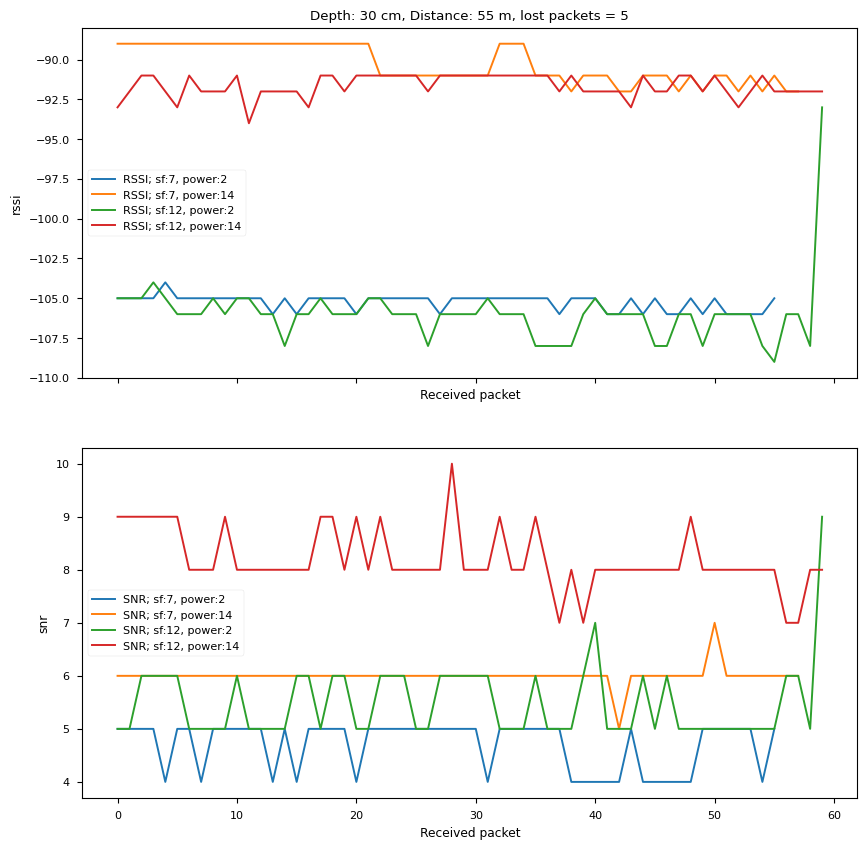

In [18]:
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark-palette')
plt.style.use('seaborn-v0_8-paper')
#plt.style.use('seaborn-v0_8-colorblind')

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

ax1.plot(df_recv_p2_sf7['rssi'], label='RSSI; sf:7, power:2')
ax1.plot(df_recv_p14_sf7['rssi'], label='RSSI; sf:7, power:14')
ax1.plot(df_recv_p2_sf12['rssi'], label='RSSI; sf:12, power:2')
ax1.plot(df_recv_p14_sf12['rssi'], label='RSSI; sf:12, power:14')

lost = lost_packet(df_send, df_recv, 8, 246)

ax1.set_title('Depth: 30 cm, Distance: 55 m, lost packets = {}'.format(lost))
ax1.set_xlabel('Received packet')
ax1.set_ylabel('rssi')
ax1.legend()

ax2.plot(df_recv_p2_sf7['snr'], label='SNR; sf:7, power:2')
ax2.plot(df_recv_p14_sf7['snr'], label='SNR; sf:7, power:14')
ax2.plot(df_recv_p2_sf12['snr'], label='SNR; sf:12, power:2')
ax2.plot(df_recv_p14_sf12['snr'], label='SNR; sf:12, power:14')


#ax2.set_title('SNR :: Depth: 30cm, Distance: 55m')
ax2.set_xlabel('Received packet')
ax2.set_ylabel('snr')
ax2.legend()


#plt.plot(df_p40_d45obs_sf7_pw14['temperature'], label='Soil moisture')
#plt.plot(df_p40_d45obs_sf12_pw2['temperature'], label='Temperature')

plt.show()

Le graphique ci-dessus montre les niveaux de RSSI et de SNR en fonction de deux paramètres de transmission. Ces deux paramètres sont : La puissance d'emission (prend en compte deux valeur 2 et 14 dans notre cas) et le spreading factor (prend également en compte deux valeur: 7 et 12 dans notre cas).

Pour le RSSI, avec une configuration où un paquet est émis avec un spreading factor de 7 et une puissance d'emission 2 dB, Le RSSI est plus faible (atteind les -107 dBm) donc plus mauvais par rapport à un paquet transmis avec puissance d'émission de 14 dB où le RSSI depasse les -95 dBm.

Pour ce qui est du SNR, une configuration où un paquet est émis avec un spreading factor de 7 et une puissance de 2 dB, le SNR est plus bas (oscille entre 4 et 5) bien qu'étant pas mauvais puisque supérieur à zéro. Il augmente légèrement (entre 5 et 6 majoritairement, avec une pique atteignant 7 et une autre 9) lorsque l'on passe à un spreading factor de 12 en gardant une puissance de 2 dB. Avec un sf de 7 et une puissance de 14 dB, le SNR devient beaucoup plus stable que toutes les autres configurations. Pour finir, avec un sf de 12 et une puissance de 14 dB, le SNR est plus élevé (entre 7 et 10).


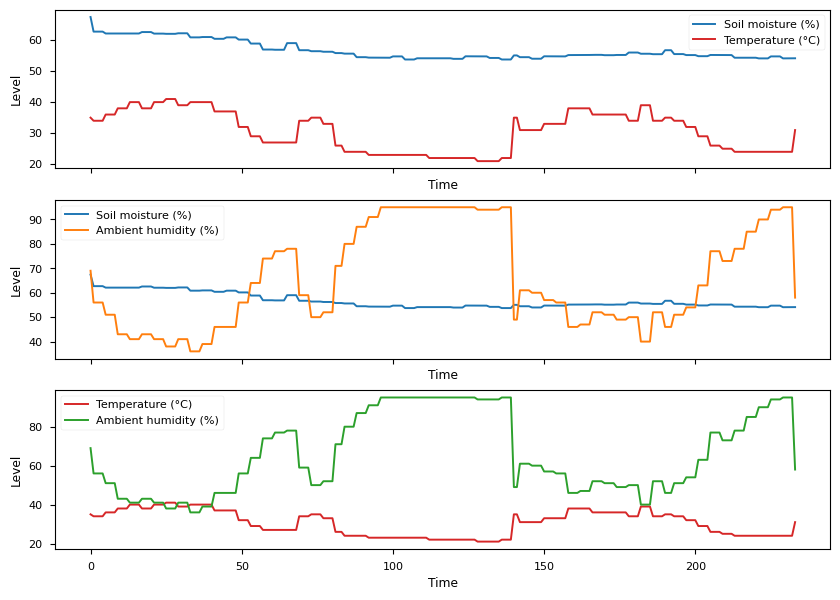

In [19]:
plt.style.use('seaborn-v0_8-paper')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 7), sharex=True)

ax1.plot(df_recv['soil_moisture'], label='Soil moisture (%)')
ax1.plot(df_recv['temperature'], label='Temperature (°C)', color='tab:red')

#ax1.set_title('Depth: 30 cm, Distance: 55 m, lost packets = {}'.format(lost))
ax1.set_xlabel('Time')
ax1.set_ylabel('Level')
ax1.legend()

ax2.plot(df_recv['soil_moisture'], label='Soil moisture (%)')
ax2.plot(df_recv['ambit_humidity'], label='Ambient humidity (%)')

ax2.set_xlabel('Time')
ax2.set_ylabel('Level')
ax2.legend()

ax3.plot(df_recv['temperature'], label='Temperature (°C)', color='tab:red')
ax3.plot(df_recv['ambit_humidity'], label='Ambient humidity (%)', color='tab:green')

ax3.set_xlabel('Time')
ax3.set_ylabel('Level')
ax3.legend()

plt.show()

Le graphique ci-dessus est une representation des valeurs captées par nos capteurs (DHT11 and soil moisture sensor). Nous avons entre autre l'humidité du sol, la température ambiante et l'humidité ambiante.
Au niveau de la première partie de cette figure il n'y a aucune correlation entre la température et l'humidité du sol cela est du certainement au fait que la température dans la serre n'est pas controlée et les plantes étaient arrosées ce qui implique que le sol reste humide malgrè la hausse de température. Cette meme observation est également faite pour la seconde partie de la figure notamment avec l'humidité ambiante et l'humidité du sol. Par contre, nous remarquons une forte correlation entre les valeurs de l'humidité ambiante et de la température.

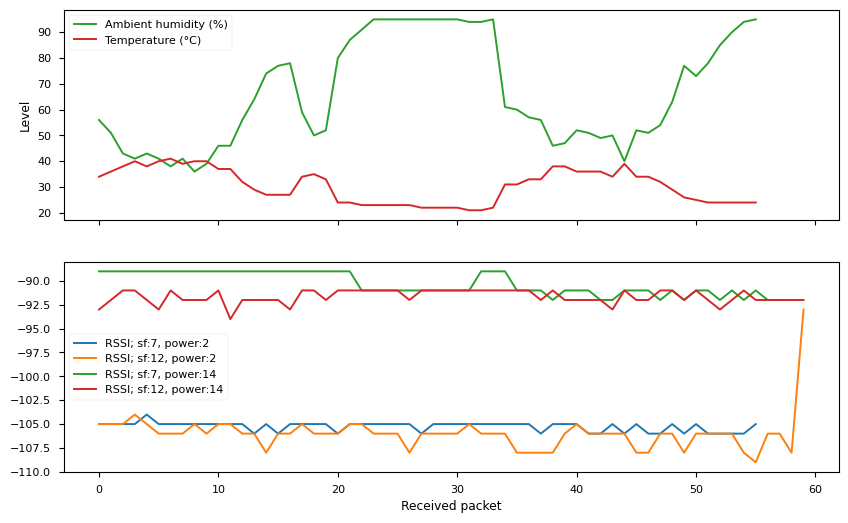

In [20]:
plt.style.use('seaborn-v0_8-paper')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

ax1.plot(df_recv_p2_sf7['ambit_humidity'], label='Ambient humidity (%)', color='tab:green')
ax1.plot(df_recv_p2_sf7['temperature'], label='Temperature (°C)', color='tab:red')

ax2.plot(df_recv_p2_sf7['rssi'], label='RSSI; sf:7, power:2')
ax2.plot(df_recv_p2_sf12['rssi'], label='RSSI; sf:12, power:2')
ax2.plot(df_recv_p14_sf7['rssi'], label='RSSI; sf:7, power:14')
ax2.plot(df_recv_p14_sf12['rssi'], label='RSSI; sf:12, power:14')

ax2.set_xlabel('Received packet')
ax1.set_ylabel('Level')
ax1.legend()
ax2.legend()

plt.show()

Dans cette figure dans laquelle nous avons tracer dans la première partie de la figure les courbes de l'humidité ambiante et de la température et dans la seconde partie de la figure le RSSI en fonction des différentes combinaisons des puissances et des spreading factors, il n'y a à vue d'oeil aucune relation que ce soit entre l'humidité ambiante et le RSSI ou entre la température et le RSSI.

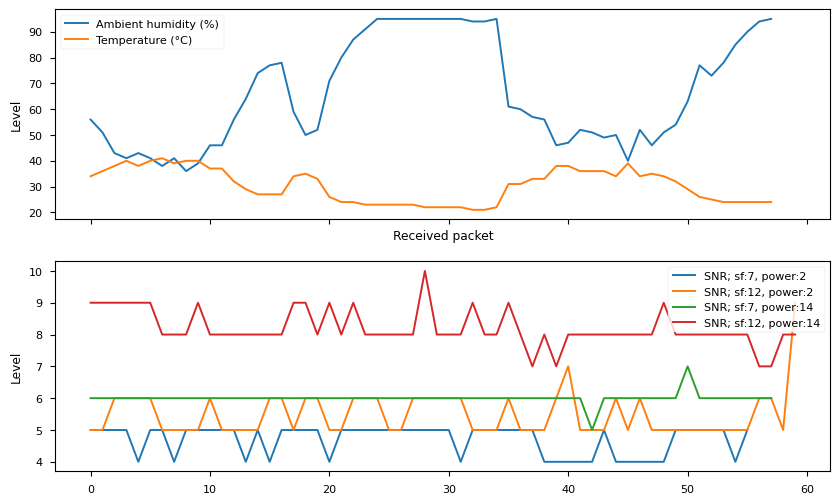

In [21]:
plt.style.use('seaborn-v0_8-paper')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

ax1.plot(df_recv_p14_sf7['ambit_humidity'], label='Ambient humidity (%)')
ax1.plot(df_recv_p14_sf7['temperature'], label='Temperature (°C)')

ax2.plot(df_recv_p2_sf7['snr'], label='SNR; sf:7, power:2')
ax2.plot(df_recv_p2_sf12['snr'], label='SNR; sf:12, power:2')
ax2.plot(df_recv_p14_sf7['snr'], label='SNR; sf:7, power:14')
ax2.plot(df_recv_p14_sf12['snr'], label='SNR; sf:12, power:14')

ax1.set_xlabel('Received packet')
ax1.set_ylabel('Level')
ax2.set_ylabel('Level')
ax1.legend()
ax2.legend()

plt.show()

Dans cette figure dans laquelle nous essayons de voire la correlation qu'il peu y avoir entre le SNR et les valeurs de la température ou l'humidité ambiante, nous remarquons une faible correlation entre l'humidité ambiante et le SNR pour des paquets envoyés avec un sf de 12 et une puissance de 14.

The above graph shows the levels of RSSI and SNR based on two transmission parameters. These two parameters are: Transmission power (taking two values 2 dB and 14 dB in our case) and spreading factor (also taking into account two values: 7 and 12 in our case).

For RSSI, in a configuration where a packet is transmitted with a spreading factor of 7 and a transmission power of 2 dB, the RSSI is lower (reaches -107 dBm) and therefore worse compared to a packet transmitted with a transmission power of 14 dB where the RSSI exceeds -95 dBm.

As for SNR, in a configuration where a packet is transmitted with a spreading factor of 7 and a power of 2 dB, the SNR is lower (between 4 and 5) but still not bad as it is above zero. It slightly increases (mostly between 5 and 6, with peaks reaching 7 and 9) when switching to a spreading factor of 12 while keeping a power of 2 dB. With a spreading factor of 7 and a power of 14 dB, the SNR becomes much more stable than all other configurations. Finally, with a spreading factor of 12 and a power of 14 dB, the SNR is higher (between 7 and 10).

The graph above represents the values captured by our sensors (DHT11 and soil moisture sensor). We have, among other things, soil moisture, ambient temperature, and ambient humidity. In the first part of this figure, there is no correlation between temperature and soil moisture, probably because the temperature in the greenhouse is not controlled and the plants were watered, resulting in the soil remaining moist despite the rise in temperature. This same observation is also made for the second part of the figure, especially with ambient humidity and soil moisture. However, a strong correlation is observed between ambient humidity and temperature.

In this figure where we plotted in the first part the curves of ambient humidity and temperature, and in the second part the RSSI based on the different combinations of powers and spreading factors, there is no visible relationship between ambient humidity and RSSI or between temperature and RSSI.

In this figure where we aim to see the correlation between SNR and temperature or ambient humidity values, we notice a weak correlation between ambient humidity and SNR for packets sent with a spreading factor of 12 and a power of 14.

The main observations we made are as follows:
The configuration sf:12 and power:14 dB shows a high RSSI and SNR compared to other configurations, possibly due to the use of maximum values for these parameters. On the other hand, with an sf of 7 and a power of 14 dB, the SNR is much more constant, indicating that factors such as noise, interference, and weather conditions barely disrupt the signal.